## 读取文件
- `TopRight_20230803.txt` 非常大，大概有 68 MB，所以处理时要小心

In [3]:
filename = "TopRight_20230803.txt"
with open(filename, "r") as file:
    lines = file.readlines()

data = []
for line in lines:
    if line.startswith("###"):
        continue
    else:
        data.append(line)

time_array = []
for value in data:
    time_array.append(value.split()[3])

len(time_array)

763301

## 画直方图
- 要求：1 dimensional histogram with 100 bins
- 结果：几乎是平整的（flat）

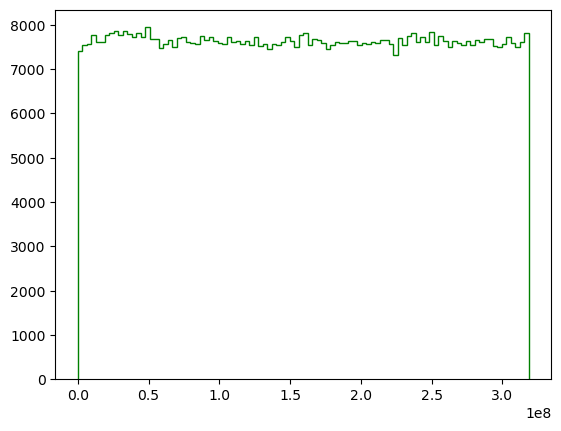

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ts_array = np.array([int(x) for x in time_array])

plt.hist(ts_array, bins=100, histtype='step', color='g')

plt.show()

In [8]:
ts_second = ts_array / 1000.0

rate = len(ts_second) /  (ts_second[-1] - ts_second[0]) 

rate


2.39595960065216

## 计算变异系数
- Hint: In this question we use the coefficient of variation as the relative statistical uncertainty. You can compute 100 rates using the stats in these 100 bins. Dividing the standard deviation of these 100 rates by the absolute value of their mean will give you the coefficient of variation.

In [48]:
timestamps = ts_array / 1000

# 将时间范围分成 100 个相等的箱
bins = np.linspace(timestamps[0], timestamps[-1], 100)

# 计算每个箱中的计数
counts, _ = np.histogram(timestamps, bins=bins)

# 计算每个箱中的比率
rates = counts / np.sum(counts)

# 计算比率的平均值
mean_rate = np.mean(rates)

# 计算比率的标准差
std_rate = np.std(rates)

# 计算变异系数
cv = std_rate / np.abs(mean_rate)

print("变异系数：", cv)

变异系数： 0.013540780970570506
